In [1]:
from PIL import Image #import Python Image Library
import pickle
import numpy as np
import os
import glob
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
root = os.getcwd()
dirs = os.listdir(root+os.path.sep +"assignment/data/new_train3/threeclass/train2") #list directory in Land Use Images folder
label = 0
label2 = 0
x_test = []
y_test = []
x_train = []
y_train = []
i_width=224#500#256 #VGG w&h
i_height=224#500#256
for i in dirs: #loop all directory in training
  for pic in glob.glob(root+os.path.sep+"assignment/data/new_train3/threeclass/train2/"+i+"/*.jpg"): #loop all picture in directory
    im = cv2.imread(pic) #open image
    im = cv2.resize(im,(i_width, i_height))
    im = np.array(im) #change into array
    if((im.shape[0]==224) and (im.shape[1] ==224)):
      r = im[:,:,0]; g = im[:,:,1]; b = im[:,:,2]; 
      x_train.append([r,g,b]) #append image into x_train
      y_train.append([label]) #append label in y_train
  label = label + 1 #after finishing in the first folder, label will be incremented 0,1..,20

for i in dirs: #loop all directory in validation
  
  for pic in glob.glob(root+os.path.sep+"assignment/data/new_train3/threeclass/validation2/"+i+"/*.jpg"): #loop all picture in directory
    im = cv2.imread(pic) #open image
    im = cv2.resize(im,(i_width, i_height))
    im = np.array(im) #change into array
    if((im.shape[0]==224) and (im.shape[1] ==224)):
      r = im[:,:,0]; g = im[:,:,1]; b = im[:,:,2]; 
      x_test.append([r,g,b]) #append image into x_test
      y_test.append([label2]) #append label in y_test    
  label2 = label2 + 1 #after finishing in the first folder, label will be incremented 0,1..,20
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(300, 3, 224, 224)
(300, 1)
(60, 3, 224, 224)
(60, 1)


In [3]:
img_rows = 224
img_cols = 224
num_class = 3

# axis swapping following tensorflow image format
x_train = np.swapaxes(x_train, 1, 3)
x_train = np.swapaxes(x_train, 1, 2)
x_test = np.swapaxes(x_test, 1, 3)
x_test = np.swapaxes(x_test, 1, 2)

x_train = x_train.astype('float32') #set x_train data type as float32
x_test = x_test.astype('float32') #set x_test data type as float32

# rescaling
x_train /= 255 #change x_train value between 0 - 1
x_test /= 255 #change x_test value between 0 - 1

# encoding
y_train = keras.utils.to_categorical(y_train, 3) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = keras.utils.to_categorical(y_test, 3) #change label to binary / categorical


In [10]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.layers import Input, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import regularizers


# model definition
input_shape = (img_rows, img_cols, 3)
input_tensor = Input(shape=input_shape)
#base_model = VGG16(include_top=False, weights="imagenet", input_tensor=input_tensor, input_shape=input_shape, pooling=None)\
base_model = VGG19(include_top=False, weights="imagenet", input_tensor=input_tensor, input_shape=input_shape, pooling=None)
x = base_model.output
#x = MaxPooling2D(pool_size=(8, 8))(x)
x = Flatten()(x)
x = Dense(1024)(x)
#x = BatchNormalization(axis=1)(x)
x = Activation("relu")(x)
x = Dropout(0.25)(x)
#x = Dense(4096, kernel_regularizer=regularizers.l2(0.001))(x)
#x = BatchNormalization(axis=1)(x)
#x = Activation("relu")(x)
#x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)
predictions = x
model = Model(inputs=base_model.inputs, outputs=predictions)
#print(model.summary())
# compile model using cross entropy loss,
# use Adam optimization algorithm, and
# track training accuracy
#for layer in base_model.layers:
    #layer.trainable = False

#model.compile(loss='categorical_crossentropy',
            #optimizer='adam')
#model.fit(x_train, y_train, batch_size=25, nb_epoch=10, verbose=1, validation_data=(x_test, y_test))


# load pretrained model weights
#pretrained_weights_A = "pretrained_VGG16.hdf5"
#model4b.load_weights(pretrained_weights_A)


/data/madhuanand/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 300 samples, validate on 60 samples
Epoch 1/30
300/300 [==============================] - 5s 18ms/step - loss: 1.0956 - acc: 0.4300 - val_loss: 0.9560 - val_acc: 0.5167
Epoch 2/30
300/300 [==============================] - 3s 10ms/step - loss: 0.8573 - acc: 0.6600 - val_loss: 0.7510 - val_acc: 0.7500
Epoch 3/30
300/300 [==============================] - 3s 10ms/step - loss: 0.6849 - acc: 0.7267 - val_loss: 0.5626 - val_acc: 0.7833
Epoch 4/30
300/300 [==============================] - 3s 10ms/step - loss: 0.4529 - acc: 0.8367 - val_loss: 0.4576 - val_acc: 0.8000
Epoch 5/30
300/300 [==============================] - 3s 10ms/step - loss: 0.3430 - acc: 0.8700 - val_loss: 0.4399 - val_acc: 0.8333
Epoch 6/30
300/300 [==============================] - 3s 10ms/step - loss: 0.3069 - acc: 0.8733 - val_loss: 0.3571 - val_acc: 0.8667
Epoch 7/30
300/300 [==============================] - 3s 10ms/step - loss: 0.2335 - acc: 0.9100 - val_loss: 0.4668 - val_acc: 0.8167
Epoch 8/30
300/300 [====

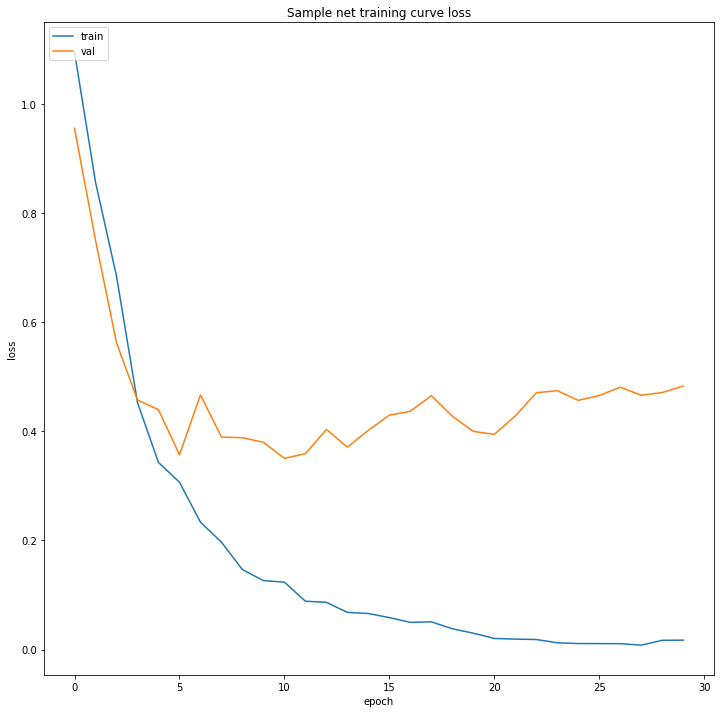


Testing accuracy of pretrained VGG19 on raw image: 90.00 %


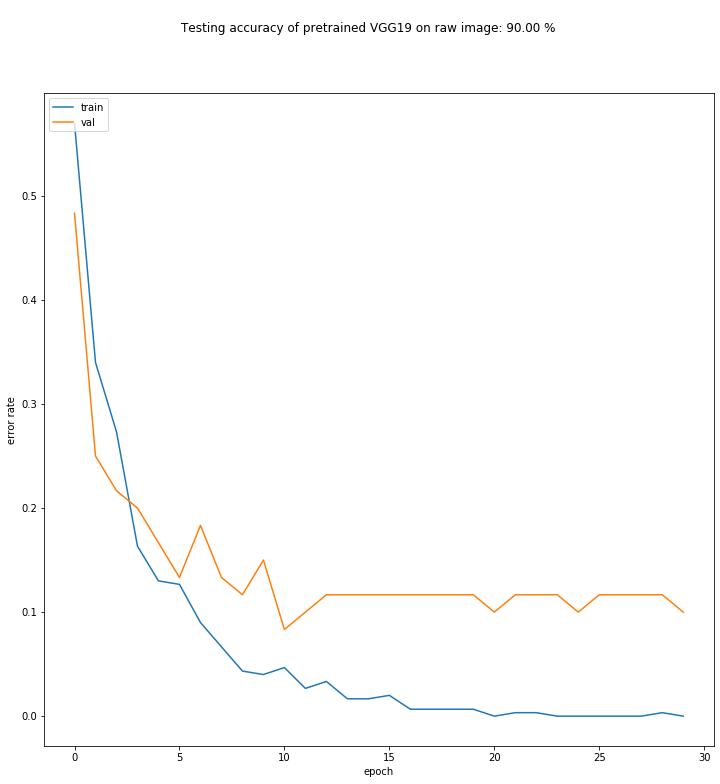


Testing accuracy of pretrained VGG16 on raw image: 90.00 %


In [11]:
from keras.optimizers import SGD
#for layer in base_model.layers[15:]:
    #layer.trainable = True

model.compile(loss='categorical_crossentropy',
            optimizer=SGD(lr=0.0001, momentum = 0.9),
            metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=25, nb_epoch=30, verbose=1, validation_data=(x_test, y_test))

# let's visualize the learning curve of the pre-trained network
#train_history_A = "VGG16_train_history"
#with open(train_history_A, "rb") as f:
#    hist = pickle.load(f)
# for 40 epochs
#hist = model4b.fit(x_train, y_train, batch_size=25, nb_epoch=20, verbose=1, validation_data=(x_test, y_test))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Sample net training curve loss")
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.savefig('vgg19_loss_threeclass.png')
plt.show()
# evaluate the accuracy of the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTesting accuracy of pretrained VGG19 on raw image: %.2f %%" % (acc*100.0))
plt.plot(1-np.array(hist.history["acc"]))
plt.plot(1-np.array(hist.history["val_acc"]))
#plt.title("Sample net training curve error rate")
plt.legend(['train', 'val'], loc='upper left')
plt.suptitle("\nTesting accuracy of pretrained VGG19 on raw image: %.2f %%" % (acc*100.0))
plt.ylabel("error rate")
plt.xlabel("epoch")
plt.savefig('vgg19_error_threeclass.png')
plt.show()

# evaluate the accuracy of the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTesting accuracy of pretrained VGG16 on raw image: %.2f %%" % (acc*100.0))

Populating the interactive namespace from numpy and matplotlib


/data/madhuanand/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[0 0 0 0 0 0 0 2 0]
0.9010989010989011
Confusion matrix, without normalization


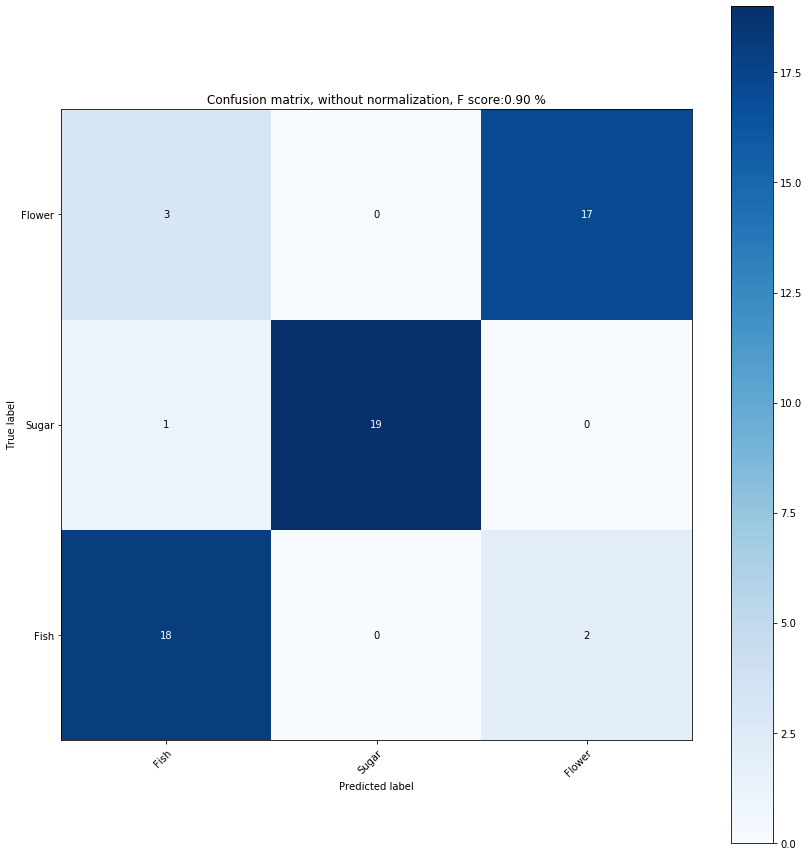

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.utils.multiclass import unique_labels
%pylab inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.ylim(-0.5, cm.shape[0]-0.5)
    plt.xlim(-0.5, cm.shape[1]-0.5)
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# flatten predictions and fetch class names
class_names = np.array(dirs)
y_pred = model.predict(x_test)
y_pred_flatten = np.argmax(y_pred, axis=1)
y_test_flatten = np.argmax(y_test, axis=1)
y_pred_flatten = y_pred_flatten.astype(np.int32)
y_test_flatten = y_test_flatten.astype(np.int32)
print(y_pred_flatten[1:10])
#labels_test = np.argmax(y_test, axis=2)
#labels_pred = np.argmax(y_pred, axis=2)
# f-score
f1score=f1_score(y_test_flatten,y_pred_flatten,average='weighted')
print(f1score)
# Plot non-normalized confusion matrix
pylab.rcParams['figure.figsize'] = (12, 12)
plot_confusion_matrix(y_test_flatten, y_pred_flatten, classes=class_names,
                      title='Confusion matrix, without normalization, F score:%.2f %%' % (f1score))
plt.savefig('confusionmatrix_threeclass_vgg19')
plt.show()

In [7]:
# Inceptionv3
input_shape = (img_rows, img_cols, 3)
input_tensor = Input(shape=input_shape)
base_model = InceptionV3(include_top=False, weights="imagenet", input_tensor=input_tensor, input_shape=input_shape, pooling=None)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(3, activation='softmax')(x)
predictions = x
model = Model(inputs=base_model.inputs, outputs=predictions)

# freeze cnn layers
#for layer in base_model.layers:
    #layer.trainable = False

#model.compile(loss='categorical_crossentropy',
            #optimizer='rmsprop')
#model.fit(x_train, y_train, batch_size=25, nb_epoch=10, verbose=1, validation_data=(x_test, y_test))


W1031 14:14:12.032823 139812368774912 deprecation_wrapper.py:119] From /data/madhuanand/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W1031 14:14:12.581784 139812368774912 deprecation_wrapper.py:119] From /data/madhuanand/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



/data/madhuanand/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 300 samples, validate on 60 samples
Epoch 1/30
300/300 [==============================] - 11s 37ms/step - loss: 1.1447 - acc: 0.3333 - val_loss: 1.0797 - val_acc: 0.4000
Epoch 2/30
300/300 [==============================] - 2s 6ms/step - loss: 1.0771 - acc: 0.4167 - val_loss: 1.0492 - val_acc: 0.4000
Epoch 3/30
300/300 [==============================] - 2s 6ms/step - loss: 1.0573 - acc: 0.4400 - val_loss: 1.0188 - val_acc: 0.5000
Epoch 4/30
300/300 [==============================] - 2s 6ms/step - loss: 0.9669 - acc: 0.5367 - val_loss: 0.9914 - val_acc: 0.5833
Epoch 5/30
300/300 [==============================] - 2s 6ms/step - loss: 0.9429 - acc: 0.5867 - val_loss: 0.9735 - val_acc: 0.5667
Epoch 6/30
300/300 [==============================] - 2s 6ms/step - loss: 0.8668 - acc: 0.6633 - val_loss: 0.9441 - val_acc: 0.6000
Epoch 7/30
300/300 [==============================] - 2s 7ms/step - loss: 0.8145 - acc: 0.7367 - val_loss: 0.9136 - val_acc: 0.6667
Epoch 8/30
300/300 [=========

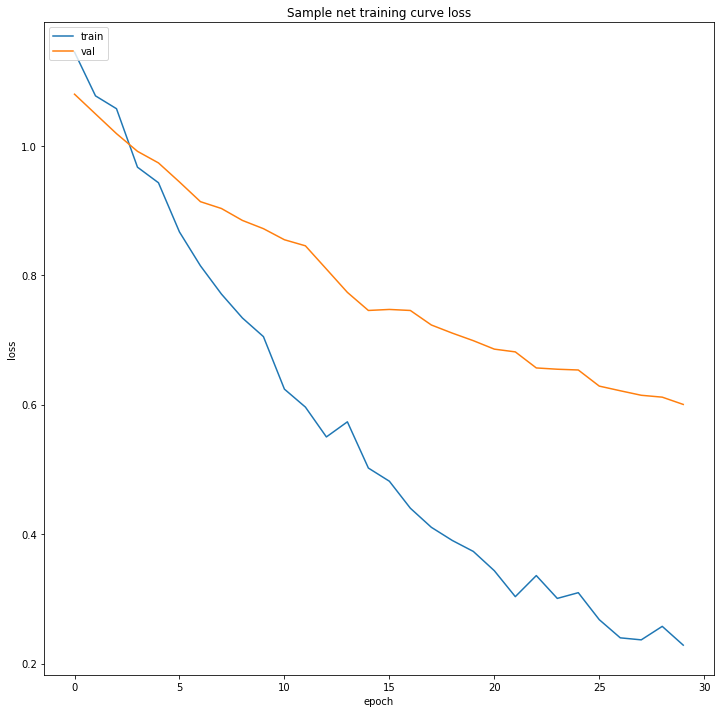


Testing accuracy of pretrained InceptionV3 on raw image: 81.67 %


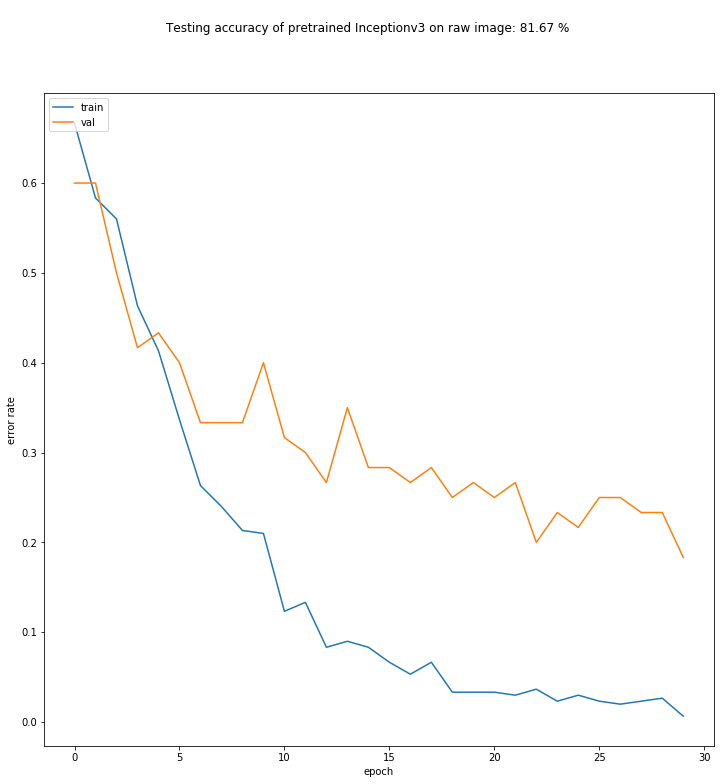


Testing accuracy of pretrained InceptionV3 on raw image: 81.67 %


In [8]:
# freeze first 249 layers
#for layer in base_model.layers[:249]:
    #layer.trainable = False
#for layer in base_model.layers[249:]:
    #layer.trainable = True

model.compile(loss='categorical_crossentropy',
            optimizer=SGD(lr=0.0001, momentum = 0.9),
            metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=25, nb_epoch=30, verbose=1, validation_data=(x_test, y_test))

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Sample net training curve loss")
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.savefig('Inceptionv3_loss_threeclass.png')
plt.show()
# evaluate the accuracy of the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTesting accuracy of pretrained InceptionV3 on raw image: %.2f %%" % (acc*100.0))
plt.plot(1-np.array(hist.history["acc"]))
plt.plot(1-np.array(hist.history["val_acc"]))
#plt.title("Sample net training curve error rate")
plt.suptitle("\nTesting accuracy of pretrained Inceptionv3 on raw image: %.2f %%" % (acc*100.0))
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel("error rate")
plt.xlabel("epoch")
plt.savefig('Inceptionv3_error_threeclass.png')
plt.show()

# evaluate the accuracy of the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTesting accuracy of pretrained InceptionV3 on raw image: %.2f %%" % (acc*100.0))

Populating the interactive namespace from numpy and matplotlib
0.8170210548259329
Confusion matrix, without normalization


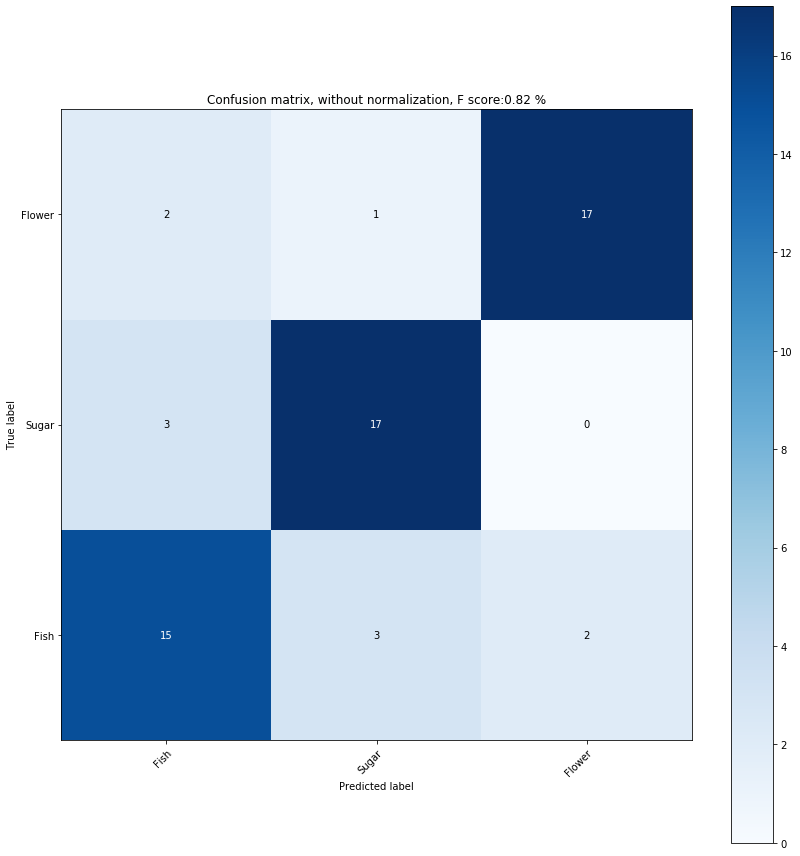

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.utils.multiclass import unique_labels
%pylab inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.ylim(-0.5, cm.shape[0]-0.5)
    plt.xlim(-0.5, cm.shape[1]-0.5)
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# flatten predictions and fetch class names
class_names = np.array(dirs)
y_pred = model.predict(x_test)
y_pred_flatten = np.argmax(y_pred, axis=1)
y_test_flatten = np.argmax(y_test, axis=1)
y_pred_flatten = y_pred_flatten.astype(np.int32)
y_test_flatten = y_test_flatten.astype(np.int32)

# f-score
f1score=f1_score(y_test_flatten,y_pred_flatten,average='weighted')
print(f1score)
# Plot non-normalized confusion matrix
pylab.rcParams['figure.figsize'] = (12, 12)
plot_confusion_matrix(y_test_flatten, y_pred_flatten, classes=class_names,
                      title='Confusion matrix, without normalization, F score:%.2f %%' % (f1score))
plt.savefig('confusionmatrix_threeclass_inceptionv3')
plt.show()